## Linear regression with higher degrees 

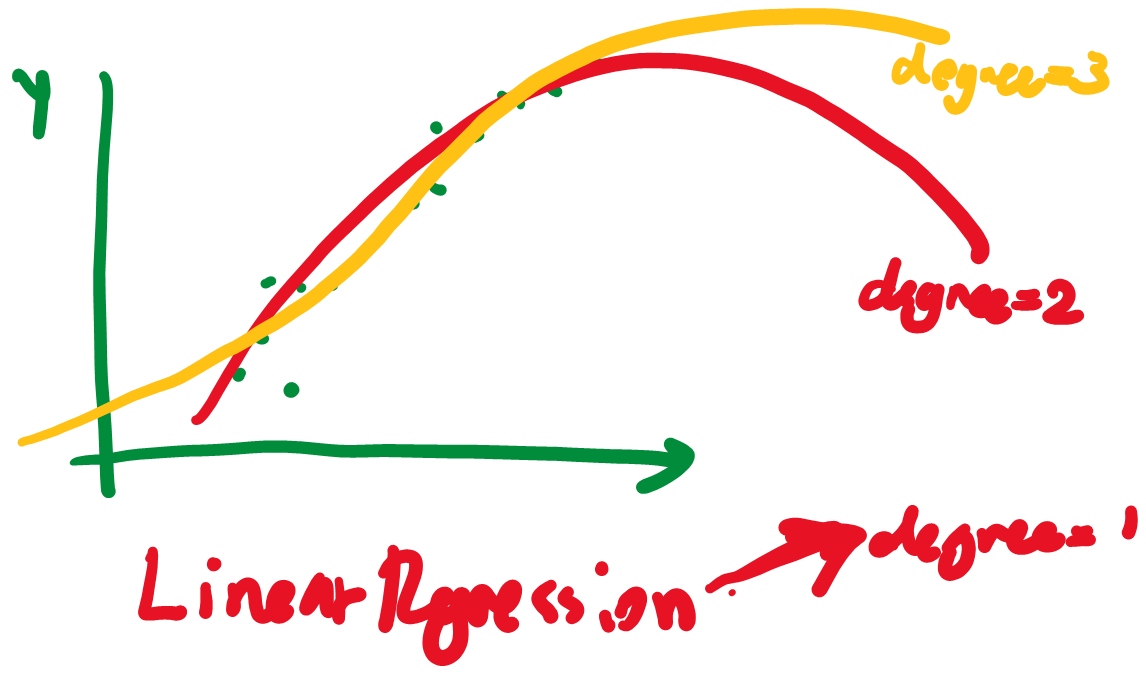

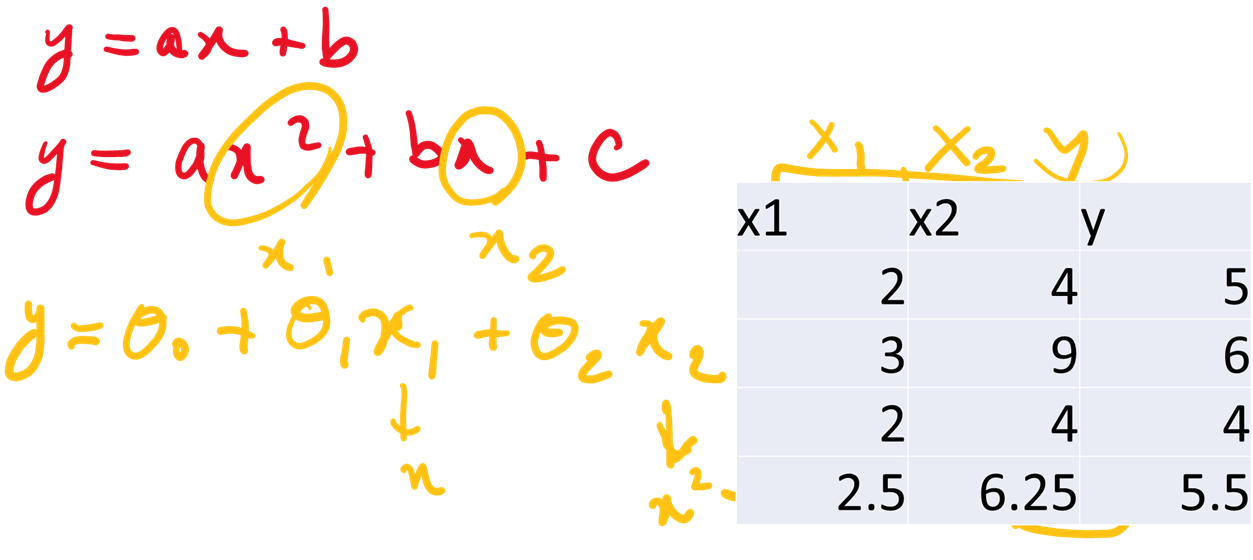

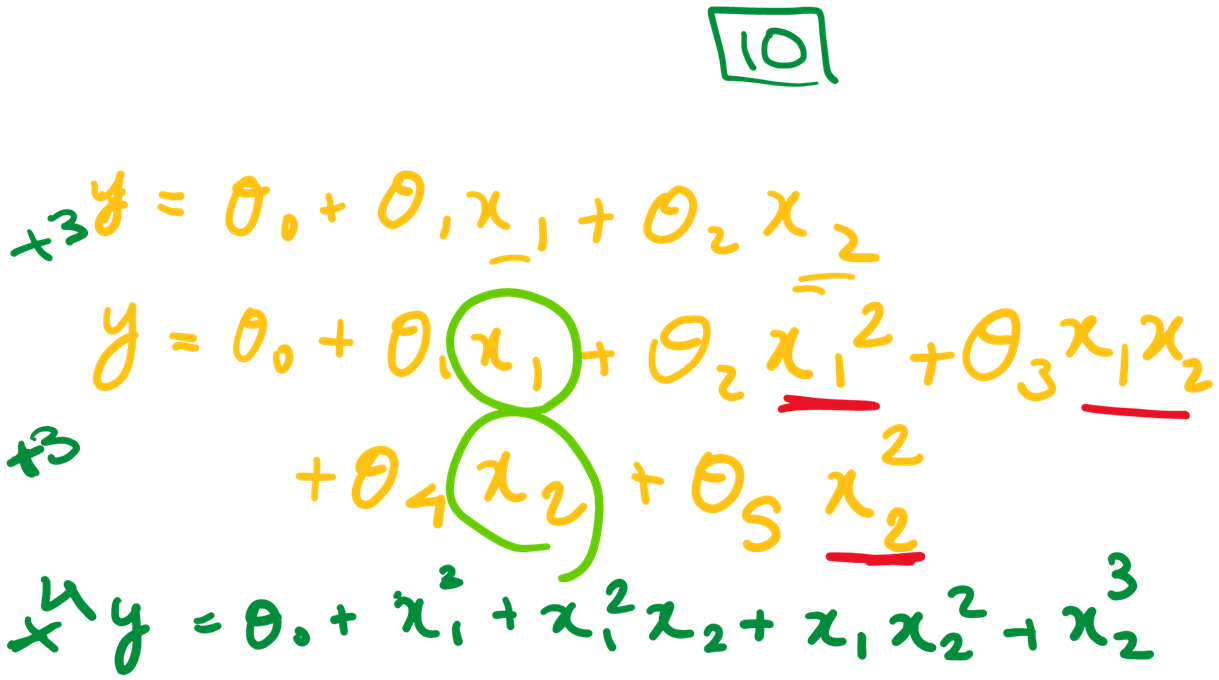

In [1]:
import pandas as pd
df=pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [5]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=.2,random_state=52)

In [7]:
df["MODELYEAR"]=pd.to_numeric(df["MODELYEAR"])
x_train=train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
x_test=test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
y_train=train["CO2EMISSIONS"]
y_test=test["CO2EMISSIONS"]

x_train.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
count,853.000000,853.000000,853.000000
mean,3.361313,5.808910,11.619930
std,1.421557,1.815379,3.503386
min,1.000000,3.000000,4.800000
25%,2.000000,4.000000,9.100000
50%,3.400000,6.000000,11.000000
75%,4.200000,8.000000,13.300000
max,8.400000,12.000000,25.800000


### Fit degree 2 polynomial

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_train.shape

(853, 3)

In [32]:
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)


In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [35]:
from sklearn.metrics import mean_squared_error
y_train_=model.predict(x_train_poly)
mse=mean_squared_error(y_train,y_train_)
print("rmse on train data is:",mse**.5)

rmse on train data is: 18.96916588949405


In [36]:
from sklearn.metrics import mean_squared_error
y_test_=model.predict(x_test_poly)
mse=mean_squared_error(y_test,y_test_)
print("rmse on test data is:",mse**.5)

rmse on test data is: 20.78361060944257


### Fit degree 5 polynomial

In [45]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)

x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [47]:
from sklearn.metrics import mean_squared_error
y_train_=model.predict(x_train_poly)
mse=mean_squared_error(y_train,y_train_)
print("rmse on train data is:",mse**.5)

rmse on train data is: 18.32559637109582


In [48]:
from sklearn.metrics import mean_squared_error
y_test_=model.predict(x_test_poly)
mse=mean_squared_error(y_test,y_test_)
print("rmse on test data is:",mse**.5)

rmse on test data is: 76.40720263010405


The results show overfitting

## Considering Categorical Features

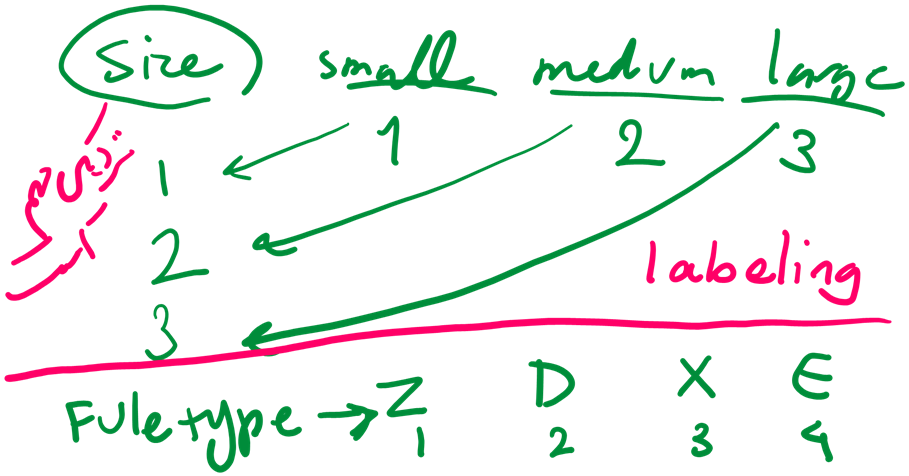

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [56]:
df["MAKE"].unique()


39

In [57]:
df["MODEL"].unique()
len(df["MODEL"].unique())## Too many categories for training the model

663

In [62]:
df["VEHICLECLASS"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [65]:
df["TRANSMISSION"].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [69]:
df["FUELTYPE"].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

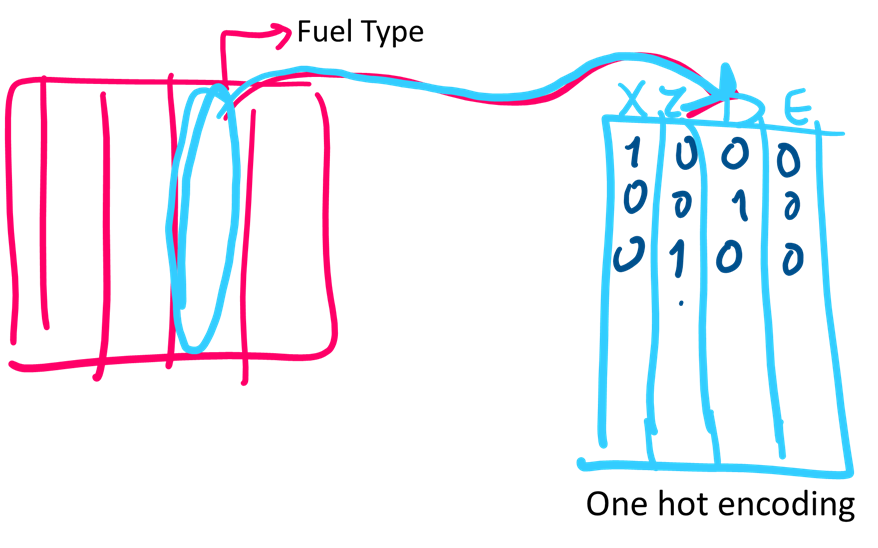

In [107]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=.2,random_state=52)

In [108]:
import numpy as np
fule_type_train=pd.get_dummies(train["FUELTYPE"])
x_train_numerical=train[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
x_train=x_train_numerical.join(fule_type_train)

fule_type_test=pd.get_dummies(test["FUELTYPE"])

x_test_numerical=test[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]]
x_test=x_test_numerical.join(fule_type_test)

In [109]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [110]:
from sklearn.metrics import mean_squared_error
y_train_=model.predict(x_train)
mse=mean_squared_error(y_train,y_train_)
print("rmse on train data is:",mse**.5)

rmse on train data is: 6.524624886729318


In [111]:
from sklearn.metrics import mean_squared_error
y_test_=model.predict(x_test)
mse=mean_squared_error(y_test,y_test_)
print("rmse on test data is:",mse**.5)

rmse on test data is: 6.4678248845622885
